In [17]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('Data.csv')
df = data.iloc[:1000]
df.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,01-01-2023,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,01-01-2023,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,01-01-2023,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,01-01-2023,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,01-01-2023,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral


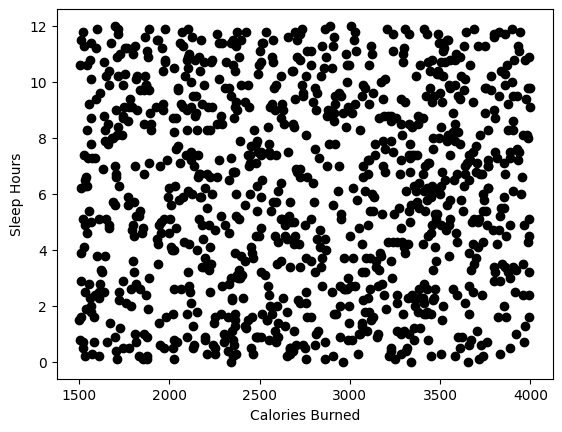

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Data.csv')
data = data.iloc[:1000]
data.head()


X = data[["calories_burned","sleep_hours"]]
plt.scatter(X["calories_burned"],X["sleep_hours"],c='black')
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Hours')
plt.show()

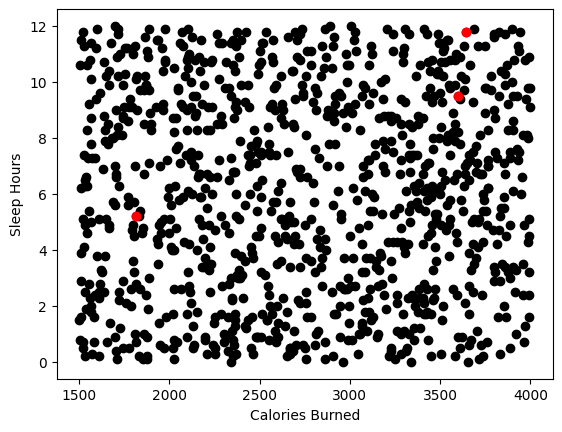

In [20]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["calories_burned"],X["sleep_hours"],c='black')
plt.scatter(Centroids["calories_burned"],Centroids["sleep_hours"],c='red')
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Hours')
plt.show()

In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["calories_burned"]-row_d["calories_burned"])**2
            d2=(row_c["sleep_hours"]-row_d["sleep_hours"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["calories_burned","sleep_hours"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['sleep_hours'] - Centroids['sleep_hours']).sum() + (Centroids_new['calories_burned'] - Centroids['calories_burned']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["sleep_hours","calories_burned"]]

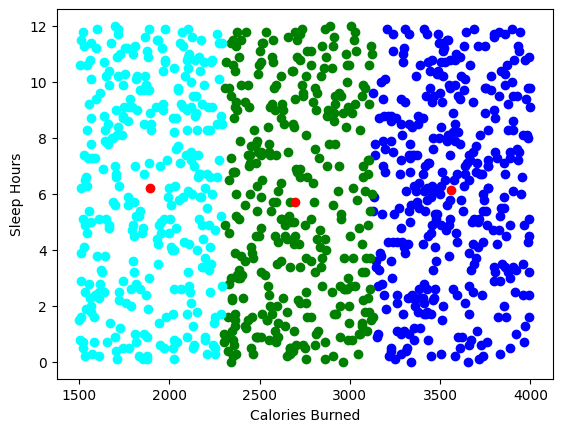

In [22]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["calories_burned"],data["sleep_hours"],c=color[k])
plt.scatter(Centroids["calories_burned"],Centroids["sleep_hours"],c='red')
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Hours')
plt.show()

In [26]:
df.head(1)

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,01-01-2023,4530,2543.02,16.1,613,1.5,176,Walking,Clear,Park,Tired


In [29]:
user = 468

index = df[df["user_id"] == 468].index[0]

if df['calories_burned'][0]<2750 and df['mood'][0]!='Tired':
    print("More exercise is recommended to the user which burns more calories in the same exercise time, alongwith a proper diet of proteins, vitamins and fiber!")
    if df['sleep_hours'][0]<6:
        print("More sleep recommended to user to keep a better mind health as well as to keep up the energy for the whole day!")
elif df['calories_burned'][0]<2750 and df['mood'][0]=='Tired':
    print("More rest recommended and the user should first focus on exercises for building up stamina to have better energy for the whole day, a proper nutritious meal of all necessary nutrients is recommended")
    if df['sleep_hours'][0]<6:
        print("More sleep recommended to user to keep a better mind health as well as to keep up the energy for the whole day!")
elif df['calories_burned'][0]>=2750 and df['calories_burned'][0]<3100 and df['mood'][0]!='Tired':
    print("User is doing apt amount of exercise needed, if the user feels like to change their workout plan to do more or less they can do so!")
    if df['sleep_hours'][0]<6:
        print("More sleep recommended to user to keep a better mind health as well as to keep up the energy for the whole day!")
elif df['calories_burned'][0]>=2750 and df['calories_burned'][0]<3100 and df['mood'][0]=='Tired':
    print("Less burdensome exercises should be taken up by the user on the basis of his needs to better manage his stamina and energy!")
    if df['sleep_hours'][0]<6:
        print("More sleep recommended to user to keep a better mind health as well as to keep up the energy for the whole day!")
elif df['calories_burned'][0]>=3100 and df['mood'][0]!='Tired':
    print("User is doing more than enough amount of workout, the user can take some time from workout to do some other hobby or work as required!")
    if df['sleep_hours'][0]<6:
        print("More sleep recommended to user to keep a better mind health as well as to keep up the energy for the whole day!")
elif df['calories_burned'][0]>=3100 and df['mood'][0]=='Tired':
    print("User is overexerting himself which can lead to serious troubles, exercise and workout should be done in moderate amounts. Taking rest is recommended to the user!")
    if df['sleep_hours'][0]<6:
        print("More sleep recommended to user to keep a better mind health as well as to keep up the energy for the whole day!")

More rest recommended and the user should first focus on exercises for building up stamina to have better energy for the whole day, a proper nutritious meal of all necessary nutrients is recommended
More sleep recommended to user to keep a better mind health as well as to keep up the energy for the whole day!
